In [1]:
!pip install tensorflow

!pip install statsmodels

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
print(os.listdir('/content/drive'))

import os

ozone_folder_path = '/content/drive/My Drive/ozone'
os.listdir(ozone_folder_path)

import os
import pandas as pd

# Folder path for the ozone datasets
ozone_folder_path = '/content/drive/My Drive/ozone'

Mounted at /content/drive
['.shortcut-targets-by-id', 'MyDrive', '.Trash-0', '.Encrypted']


In [3]:
underhill_path = os.path.join(ozone_folder_path, 'Underhill.csv')
underhill_df = pd.read_csv(underhill_path)
def count_words_and_chars(df):
    word_count = df.applymap(lambda x: len(str(x).split()) if isinstance(x, str) else 0).sum().sum()
    char_count = df.applymap(lambda x: len(str(x)) if isinstance(x, str) else 0).sum().sum()
    return word_count, char_count
underhill_size = underhill_df.memory_usage(deep=True).sum()
underhill_row_count, underhill_col_count = underhill_df.shape
underhill_word_count, underhill_char_count = count_words_and_chars(underhill_df)
print(f"Underhill Dataset:")
print(f"  Size: {underhill_size} bytes")
print(f"  Rows: {underhill_row_count}, Columns: {underhill_col_count}")
print(f"  Word Count: {underhill_word_count}")
print(f"  Character Count: {underhill_char_count}")



/tmp/ipython-input-749875725.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  underhill_df = pd.read_csv(underhill_path)
/tmp/ipython-input-749875725.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_count = df.applymap(lambda x: len(str(x).split()) if isinstance(x, str) else 0).sum().sum()
/tmp/ipython-input-749875725.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  char_count = df.applymap(lambda x: len(str(x)) if isinstance(x, str) else 0).sum().sum()


Underhill Dataset:
  Size: 136170517 bytes
  Rows: 198889, Columns: 25
  Word Count: 2416214
  Character Count: 17976214


In [5]:
# Remove unnecessary columns (POC, Site_Num, Method_Type)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

underhill_cleaned_df = underhill_df.drop(columns=['POC', 'Site_Num', 'Method_Type'])

# Normalize the numerical columns
numerical_columns = ['Latitude', 'Longitude', 'Horizontal_Accuracy', 'State_Code', 'County_Code', 'Parameter_Code', 'Sample_Measurement']
scaler = MinMaxScaler()
underhill_cleaned_df[numerical_columns] = scaler.fit_transform(underhill_cleaned_df[numerical_columns])

# Tokenize any textual data (like 'AQS_Parameter_Desc', 'Method_Description')
text_columns = ['AQS_Parameter_Desc', 'Method_Description']
vectorizer = CountVectorizer(stop_words='english')

# Tokenizing the 'Method_Description' column
underhill_text_tokenized = vectorizer.fit_transform(underhill_cleaned_df['Method_Description'].fillna(''))

# Function to remove HTML tags from the relevant columns (in case there are any HTML tags)
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Remove HTML tags from 'Method_Description' column
underhill_cleaned_df['Method_Description'] = underhill_cleaned_df['Method_Description'].apply(lambda x: str(x) if isinstance(x, str) else '')
# Reapply the HTML tag removal
underhill_cleaned_df['Method_Description'] = underhill_cleaned_df['Method_Description'].apply(remove_html_tags)

# Display the cleaned data for Underhill (just to check the changes)
print("Cleaned Underhill Dataset Head:")
print(underhill_cleaned_df.head())


Cleaned Underhill Dataset Head:
   Latitude  Longitude  Datum  Horizontal_Accuracy  State_Code  County_Code  \
0       1.0        0.0  WGS84                  0.0         0.0          0.0   
1       1.0        0.0  WGS84                  0.0         0.0          0.0   
2       1.0        0.0  WGS84                  0.0         0.0          0.0   
3       1.0        0.0  WGS84                  0.0         0.0          0.0   
4       1.0        0.0  WGS84                  0.0         0.0          0.0   

   Parameter_Code AQS_Parameter_Desc Date_Local 24_Hour_Local  ... Year_GMT  \
0             0.0              Ozone  8/23/1991         01:00  ...   1991.0   
1             0.0              Ozone   6/8/1991         01:00  ...   1991.0   
2             0.0              Ozone  8/19/1993         01:00  ...   1993.0   
3             0.0              Ozone  9/22/1991         01:00  ...   1991.0   
4             0.0              Ozone  7/12/1991         01:00  ...   1991.0   

  Day_In_Year_GMT 

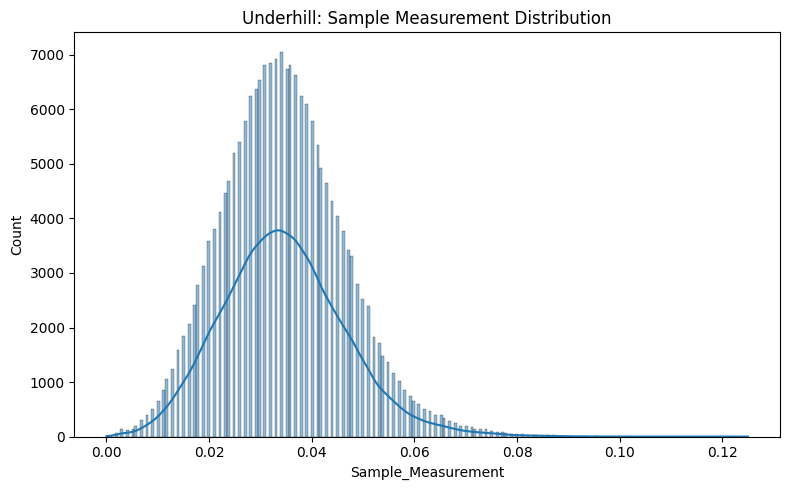

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram and KDE for Sample Measurement Distribution
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(underhill_df['Sample_Measurement'], kde=True, ax=axes).set_title("Underhill: Sample Measurement Distribution")
plt.tight_layout()
plt.show()


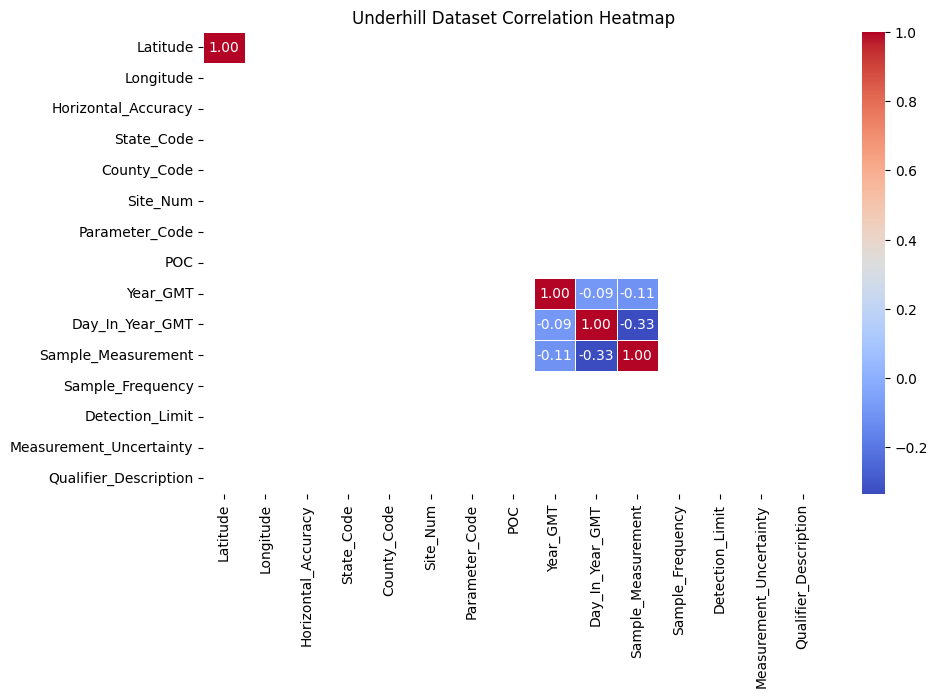

In [8]:
# Correlation Heatmap
underhill_numeric = underhill_df.select_dtypes(include=np.number)
underhill_corr = underhill_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(underhill_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Underhill Dataset Correlation Heatmap")
plt.show()

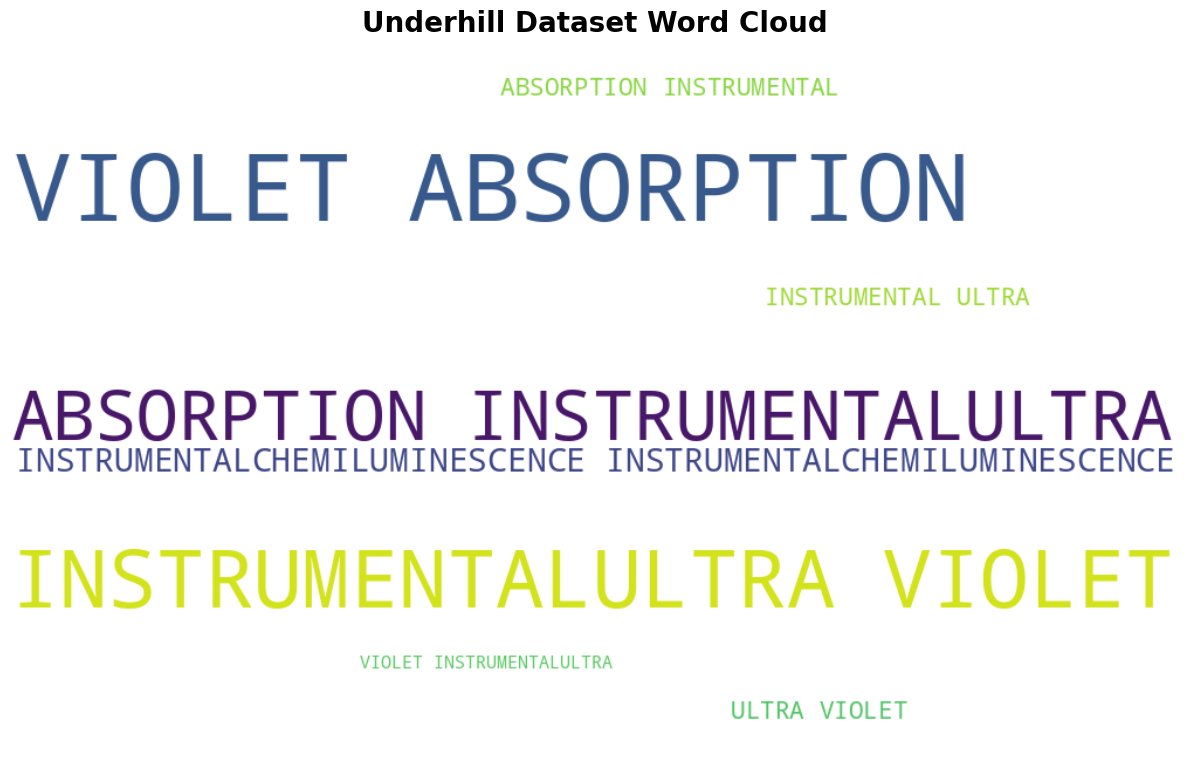


Most frequent words in Underhill Dataset:
VIOLET: 175294
ABSORPTION: 170554
INSTRUMENTALULTRA: 163023
INSTRUMENTALCHEMILUMINESCENCE: 23594
INSTRUMENTAL: 12271
ULTRA: 12271
nan: 1


In [10]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

underhill_path = os.path.join(ozone_folder_path, 'Underhill.csv')
underhill_df = pd.read_csv(underhill_path, low_memory=False)

# Extract 'Method_Description' column and clean the text
underhill_text = ' '.join(underhill_df['Method_Description'].astype(str).dropna())

# Remove non-alphabetic characters
underhill_text = re.sub(r'[^a-zA-Z\s]', '', underhill_text)

# Generate WordCloud
underhill_wordcloud = WordCloud(width=1000, height=600, background_color='white',
                                  colormap='viridis', contour_color='black', contour_width=1,
                                  max_words=100, min_font_size=10).generate(underhill_text)

# Display WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(underhill_wordcloud, interpolation='bilinear')
plt.title('Underhill Dataset Word Cloud', fontsize=20, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# Count and print most frequent words
words = underhill_text.split()
word_counts = Counter(words)

print("\nMost frequent words in Underhill Dataset:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")


In [12]:
#lstm attention

Underhill Dataset Split (80-10-10):
Training set: 159111 rows
Validation set: 19889 rows
Test set: 19889 rows
Preparing features...
Epoch 1/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 92s 18ms/step - loss: 0.8892 - mae: 0.7260 - val_loss: 0.7730 - val_mae: 0.6665 - learning_rate: 0.0010
Epoch 2/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 86s 17ms/step - loss: 0.7978 - mae: 0.6768 - val_loss: 0.7646 - val_mae: 0.6596 - learning_rate: 0.0010
Epoch 3/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 143s 18ms/step - loss: 0.7951 - mae: 0.6739 - val_loss: 0.7676 - val_mae: 0.6611 - learning_rate: 0.0010
Epoch 4/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 89s 18ms/step - loss: 0.7836 - mae: 0.6685 - val_loss: 0.7623 - val_mae: 0.6621 - learning_rate: 0.0010
Epoch 5/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 95s 19ms/step - loss: 0.7839 - mae: 0.6692 - val_loss: 0.7628 - val_mae: 0.6581 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/ste

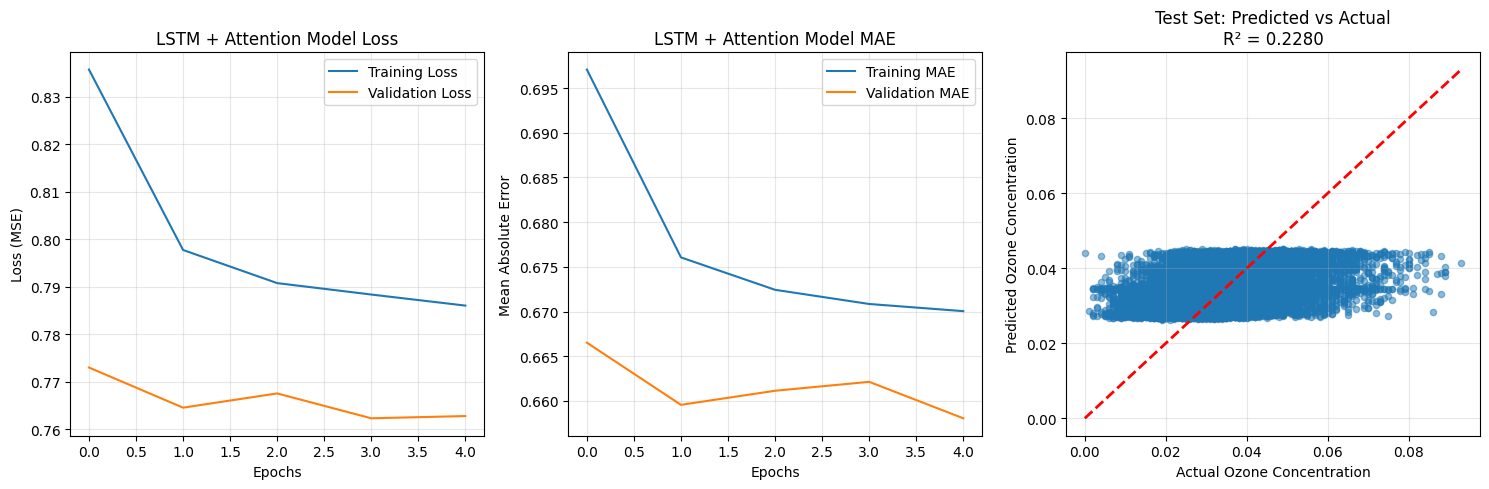


Model saved as 'lstm_attention_underhill_model.h5'


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 10, 100)   │     44,400 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 10, 100)   │          1 │ lstm[0][0],       │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 10, 100)   │          0 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 50)        │     30,200 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │      2,550 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 50)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 25)        │      1,275 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 25)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         26 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 235,358 (919.37 KB)

 Trainable params: 78,452 (306.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156,906 (612.92 KB)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Add, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Split Underhill dataset: 80% train, 20% temp (for validation and test)
underhill_train, underhill_temp = train_test_split(underhill_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
underhill_val, underhill_test = train_test_split(underhill_temp, test_size=0.5, random_state=42)

print("Underhill Dataset Split (80-10-10):")
print(f"Training set: {len(underhill_train)} rows")
print(f"Validation set: {len(underhill_val)} rows")
print(f"Test set: {len(underhill_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for LSTM + Attention model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Underhill dataset
print("Preparing features...")

# Underhill dataset
underhill_train_X, underhill_train_y = prepare_features(underhill_train)
underhill_val_X, underhill_val_y = prepare_features(underhill_val)
underhill_test_X, underhill_test_y = prepare_features(underhill_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if underhill_train_y is not None and underhill_train_y.isnull().any():
    underhill_train_y = underhill_train_y.fillna(underhill_train_y.median())

# Impute NaNs in y_val with its median
if underhill_val_y is not None and underhill_val_y.isnull().any():
    underhill_val_y = underhill_val_y.fillna(underhill_val_y.median())

# Impute NaNs in y_test with its median
if underhill_test_y is not None and underhill_test_y.isnull().any():
    underhill_test_y = underhill_test_y.fillna(underhill_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
underhill_train_X_scaled = scaler_X.fit_transform(underhill_train_X)
underhill_val_X_scaled = scaler_X.transform(underhill_val_X)
underhill_test_X_scaled = scaler_X.transform(underhill_test_X)

underhill_train_y_scaled = scaler_y.fit_transform(underhill_train_y.values.reshape(-1, 1)).flatten()
underhill_val_y_scaled = scaler_y.transform(underhill_val_y.values.reshape(-1, 1)).flatten()
underhill_test_y_scaled = scaler_y.transform(underhill_test_y.values.reshape(-1, 1)).flatten()

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
underhill_train_X_seq, underhill_train_y_seq = create_sequences(underhill_train_X_scaled, underhill_train_y_scaled, sequence_length)
underhill_val_X_seq, underhill_val_y_seq = create_sequences(underhill_val_X_scaled, underhill_val_y_scaled, sequence_length)
underhill_test_X_seq, underhill_test_y_seq = create_sequences(underhill_test_X_scaled, underhill_test_y_scaled, sequence_length)

# LSTM + Attention Mechanism Model Architecture
def create_lstm_attention_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layer
    lstm = LSTM(100, return_sequences=True)(inputs)

    # Attention mechanism
    attention = Attention(use_scale=True)([lstm, lstm])  # Scaled attention
    attention = Dropout(0.2)(attention)  # Optional dropout for regularization

    # LSTM after attention
    lstm2 = LSTM(50, return_sequences=False)(attention)

    # Dense layers
    dense1 = Dense(50, activation='relu')(lstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, underhill_train_X_scaled.shape[1])
lstm_attention_model = create_lstm_attention_model(input_shape)

# Compile the model
lstm_attention_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = lstm_attention_model.fit(
    underhill_train_X_seq, underhill_train_y_seq,
    validation_data=(underhill_val_X_seq, underhill_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
underhill_train_pred = lstm_attention_model.predict(underhill_train_X_seq)
underhill_val_pred = lstm_attention_model.predict(underhill_val_X_seq)
underhill_test_pred = lstm_attention_model.predict(underhill_test_X_seq)

# Inverse transform predictions and actual values
underhill_train_y_actual = scaler_y.inverse_transform(underhill_train_y_seq.reshape(-1, 1)).flatten()
underhill_val_y_actual = scaler_y.inverse_transform(underhill_val_y_seq.reshape(-1, 1)).flatten()
underhill_test_y_actual = scaler_y.inverse_transform(underhill_test_y_seq.reshape(-1, 1)).flatten()

underhill_train_y_pred = scaler_y.inverse_transform(underhill_train_pred).flatten()
underhill_val_y_pred = scaler_y.inverse_transform(underhill_val_pred).flatten()
underhill_test_y_pred = scaler_y.inverse_transform(underhill_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(underhill_train_y_actual, underhill_train_y_pred, "Training")
val_metrics = calculate_metrics(underhill_val_y_actual, underhill_val_y_pred, "Validation")
test_metrics = calculate_metrics(underhill_test_y_actual, underhill_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM + Attention Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('LSTM + Attention Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(underhill_test_y_actual, underhill_test_y_pred, alpha=0.5, s=20)
plt.plot([underhill_test_y_actual.min(), underhill_test_y_actual.max()],
         [underhill_test_y_actual.min(), underhill_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
lstm_attention_model.save('lstm_attention_underhill_model.h5')
print("\nModel saved as 'lstm_attention_underhill_model.h5'")

lstm_attention_model.summary()


In [14]:
#CNN-LSTM model

Underhill Dataset Split (80-10-10):
Training set: 159111 rows
Validation set: 19889 rows
Test set: 19889 rows
Preparing features...
Epoch 1/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 88s 16ms/step - loss: 0.9262 - mae: 0.7446 - val_loss: 0.8271 - val_mae: 0.6962 - learning_rate: 0.0010
Epoch 2/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 76s 15ms/step - loss: 0.8459 - mae: 0.7033 - val_loss: 0.8040 - val_mae: 0.6808 - learning_rate: 0.0010
Epoch 3/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 99s 20ms/step - loss: 0.8263 - mae: 0.6911 - val_loss: 0.7876 - val_mae: 0.6756 - learning_rate: 0.0010
Epoch 4/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 92s 18ms/step - loss: 0.8134 - mae: 0.6862 - val_loss: 0.7730 - val_mae: 0.6662 - learning_rate: 0.0010
Epoch 5/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 75s 15ms/step - loss: 0.8098 - mae: 0.6814 - val_loss: 0.7767 - val_mae: 0.6680 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

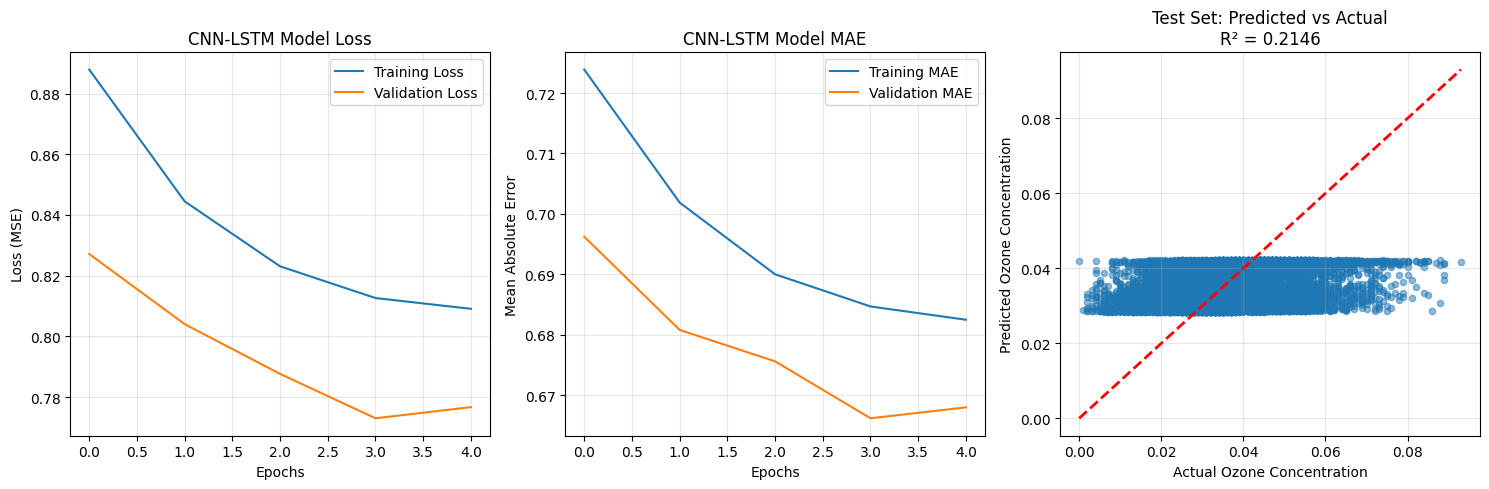


Model saved as 'cnn_lstm_ozone_model.h5'

Feature Importance Analysis:
          Feature  Importance
9       DayOfYear   27.758934
6           Month   26.541348
5            Year   17.634010
1       Longitude   16.617447
0        Latitude   16.339081
2      State_Code   16.324993
4  Parameter_Code   15.587436
3     County_Code   15.543289
7             Day   11.233067
8       DayOfWeek   11.013873


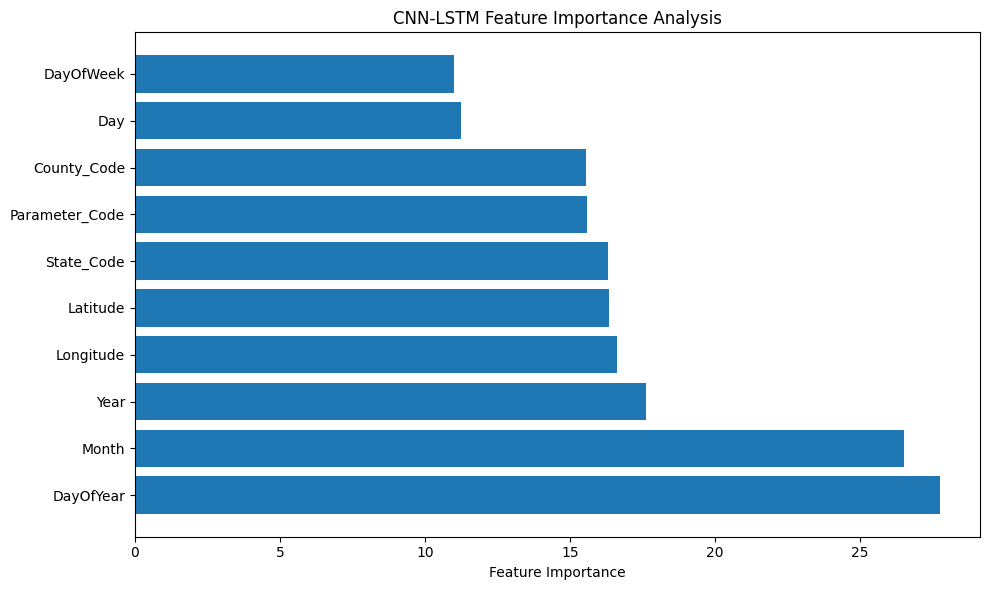

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 10, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 5, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 2, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 2, 100)         │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,139 (1.73 MB)

 Trainable params: 151,379 (591.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 302,760 (1.15 MB)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Split Underhill dataset: 80% train, 20% temp (for validation and test)
underhill_train, underhill_temp = train_test_split(underhill_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
underhill_val, underhill_test = train_test_split(underhill_temp, test_size=0.5, random_state=42)

print("Underhill Dataset Split (80-10-10):")
print(f"Training set: {len(underhill_train)} rows")
print(f"Validation set: {len(underhill_val)} rows")
print(f"Test set: {len(underhill_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for CNN-LSTM model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Underhill dataset
print("Preparing features...")

# Underhill dataset
underhill_train_X, underhill_train_y = prepare_features(underhill_train)
underhill_val_X, underhill_val_y = prepare_features(underhill_val)
underhill_test_X, underhill_test_y = prepare_features(underhill_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if underhill_train_y is not None and underhill_train_y.isnull().any():
    underhill_train_y = underhill_train_y.fillna(underhill_train_y.median())

# Impute NaNs in y_val with its median
if underhill_val_y is not None and underhill_val_y.isnull().any():
    underhill_val_y = underhill_val_y.fillna(underhill_val_y.median())

# Impute NaNs in y_test with its median
if underhill_test_y is not None and underhill_test_y.isnull().any():
    underhill_test_y = underhill_test_y.fillna(underhill_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
underhill_train_X_scaled = scaler_X.fit_transform(underhill_train_X)
underhill_val_X_scaled = scaler_X.transform(underhill_val_X)
underhill_test_X_scaled = scaler_X.transform(underhill_test_X)

underhill_train_y_scaled = scaler_y.fit_transform(underhill_train_y.values.reshape(-1, 1)).flatten()
underhill_val_y_scaled = scaler_y.transform(underhill_val_y.values.reshape(-1, 1)).flatten()
underhill_test_y_scaled = scaler_y.transform(underhill_test_y.values.reshape(-1, 1)).flatten()

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
underhill_train_X_seq, underhill_train_y_seq = create_sequences(underhill_train_X_scaled, underhill_train_y_scaled, sequence_length)
underhill_val_X_seq, underhill_val_y_seq = create_sequences(underhill_val_X_scaled, underhill_val_y_scaled, sequence_length)
underhill_test_X_seq, underhill_test_y_seq = create_sequences(underhill_test_X_scaled, underhill_test_y_scaled, sequence_length)

# CNN-LSTM Hybrid Model Architecture
def create_cnn_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # CNN layers
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(0.2)(conv1)

    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv2 = Dropout(0.2)(conv2)

    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)
    conv3 = Dropout(0.2)(conv3)

    # LSTM layers
    lstm1 = LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(conv3)
    lstm2 = LSTM(50, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)(lstm1)

    # Dense layers
    dense1 = Dense(50, activation='relu')(lstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, underhill_train_X_scaled.shape[1])
cnn_lstm_model = create_cnn_lstm_model(input_shape)

# Compile the model
cnn_lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = cnn_lstm_model.fit(
    underhill_train_X_seq, underhill_train_y_seq,
    validation_data=(underhill_val_X_seq, underhill_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
underhill_train_pred = cnn_lstm_model.predict(underhill_train_X_seq)
underhill_val_pred = cnn_lstm_model.predict(underhill_val_X_seq)
underhill_test_pred = cnn_lstm_model.predict(underhill_test_X_seq)

# Inverse transform predictions and actual values
underhill_train_y_actual = scaler_y.inverse_transform(underhill_train_y_seq.reshape(-1, 1)).flatten()
underhill_val_y_actual = scaler_y.inverse_transform(underhill_val_y_seq.reshape(-1, 1)).flatten()
underhill_test_y_actual = scaler_y.inverse_transform(underhill_test_y_seq.reshape(-1, 1)).flatten()

underhill_train_y_pred = scaler_y.inverse_transform(underhill_train_pred).flatten()
underhill_val_y_pred = scaler_y.inverse_transform(underhill_val_pred).flatten()
underhill_test_y_pred = scaler_y.inverse_transform(underhill_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(underhill_train_y_actual, underhill_train_y_pred, "Training")
val_metrics = calculate_metrics(underhill_val_y_actual, underhill_val_y_pred, "Validation")
test_metrics = calculate_metrics(underhill_test_y_actual, underhill_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('CNN-LSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(underhill_test_y_actual, underhill_test_y_pred, alpha=0.5, s=20)
plt.plot([underhill_test_y_actual.min(), underhill_test_y_actual.max()],
         [underhill_test_y_actual.min(), underhill_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
cnn_lstm_model.save('cnn_lstm_ozone_model.h5')
print("\nModel saved as 'cnn_lstm_ozone_model.h5'")

# --- Feature Importance Analysis ---
def analyze_feature_importance(model, feature_names):
    """
    Analyze feature importance based on the weights of the first Conv1D layer.
    """
    if not model.layers or not isinstance(model.layers[1], Conv1D):
        print("Error: The model does not have a Conv1D layer.")
        return

    # Extract weights of the first Conv1D layer
    conv_weights = model.layers[1].get_weights()[0]  # shape: (kernel_size, input_dim, filters)

    # Compute the importance for each input feature (sum of absolute weights across kernel and filters)
    feature_importance = np.sum(np.abs(conv_weights), axis=(0, 2))  # Corrected summation axis

    # Create a dataframe for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    return importance_df

# Ensure the feature names are available
# Assuming underhill_train_X is still in the environment from the previous cell execution
feature_names = underhill_train_X.columns.tolist()

# Analyze feature importance
importance_df = analyze_feature_importance(cnn_lstm_model, feature_names)

# Plot feature importance
if importance_df is not None:
    print("\nFeature Importance Analysis:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.title('CNN-LSTM Feature Importance Analysis')
    plt.tight_layout()
    plt.show()

cnn_lstm_model.summary()


In [17]:
#Arima

Underhill Dataset Split (80-10-10):
Training set: 159111 rows
Validation set: 19889 rows
Test set: 19889 rows
Preparing features...
Epoch 1/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 187s 35ms/step - loss: 1.3920 - mae: 0.9280 - val_loss: 1.1627 - val_mae: 0.8393 - learning_rate: 0.0010
Epoch 2/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 158s 32ms/step - loss: 1.2215 - mae: 0.8615 - val_loss: 1.1553 - val_mae: 0.8364 - learning_rate: 0.0010
Epoch 3/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 201s 32ms/step - loss: 1.2247 - mae: 0.8619 - val_loss: 1.1525 - val_mae: 0.8351 - learning_rate: 0.0010
Epoch 4/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 158s 32ms/step - loss: 1.2079 - mae: 0.8551 - val_loss: 1.1646 - val_mae: 0.8400 - learning_rate: 0.0010
Epoch 5/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 202s 32ms/step - loss: 1.2058 - mae: 0.8533 - val_loss: 1.1532 - val_mae: 0.8356 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step
622/622 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms

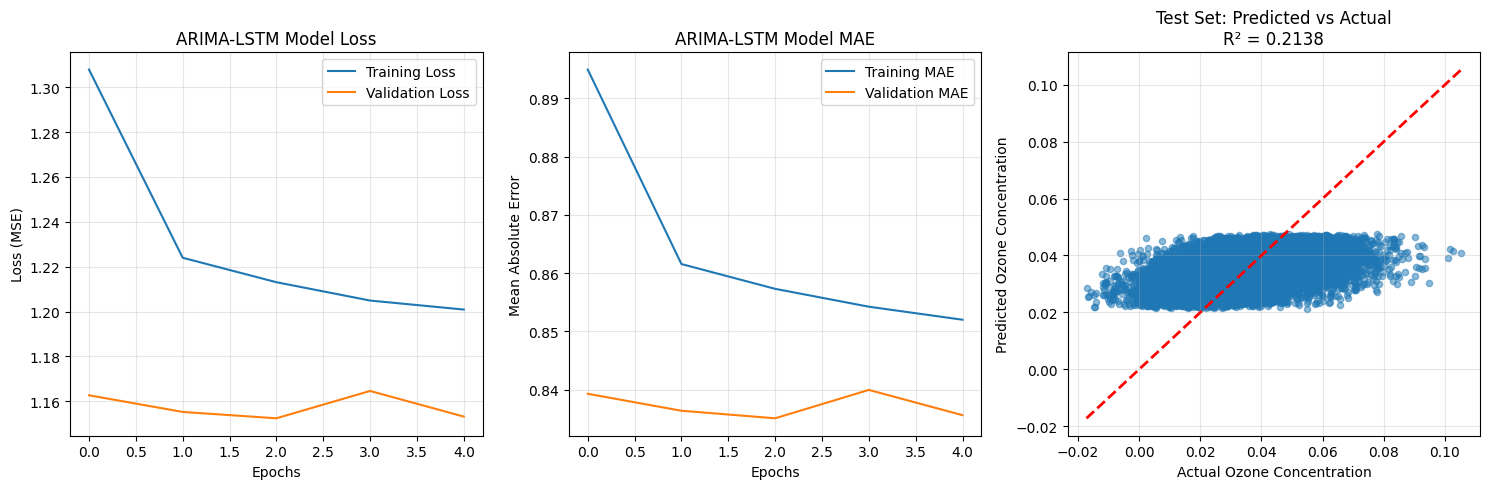


Model saved as 'arima_lstm_ozone_model.h5'


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Split Underhill dataset: 80% train, 20% temp (for validation and test)
underhill_train, underhill_temp = train_test_split(underhill_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
underhill_val, underhill_test = train_test_split(underhill_temp, test_size=0.5, random_state=42)

print("Underhill Dataset Split (80-10-10):")
print(f"Training set: {len(underhill_train)} rows")
print(f"Validation set: {len(underhill_val)} rows")
print(f"Test set: {len(underhill_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for ARIMA-LSTM model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Underhill dataset
print("Preparing features...")

# Underhill dataset
underhill_train_X, underhill_train_y = prepare_features(underhill_train)
underhill_val_X, underhill_val_y = prepare_features(underhill_val)
underhill_test_X, underhill_test_y = prepare_features(underhill_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if underhill_train_y is not None and underhill_train_y.isnull().any():
    underhill_train_y = underhill_train_y.fillna(underhill_train_y.median())

# Impute NaNs in y_val with its median
if underhill_val_y is not None and underhill_val_y.isnull().any():
    underhill_val_y = underhill_val_y.fillna(underhill_val_y.median())

# Impute NaNs in y_test with its median
if underhill_test_y is not None and underhill_test_y.isnull().any():
    underhill_test_y = underhill_test_y.fillna(underhill_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
underhill_train_X_scaled = scaler_X.fit_transform(underhill_train_X)
underhill_val_X_scaled = scaler_X.transform(underhill_val_X)
underhill_test_X_scaled = scaler_X.transform(underhill_test_X)

underhill_train_y_scaled = scaler_y.fit_transform(underhill_train_y.values.reshape(-1, 1)).flatten()
underhill_val_y_scaled = scaler_y.transform(underhill_val_y.values.reshape(-1, 1)).flatten()
underhill_test_y_scaled = scaler_y.transform(underhill_test_y.values.reshape(-1, 1)).flatten()

# ARIMA Differencing for Stationarity
def arima_differencing(y, order=(1,1,0)):
    model = ARIMA(y, order=order)
    model_fit = model.fit()
    residuals = model_fit.resid
    return residuals

# Apply ARIMA differencing on the target variable
underhill_train_y_diff = arima_differencing(underhill_train_y_scaled)
underhill_val_y_diff = arima_differencing(underhill_val_y_scaled)
underhill_test_y_diff = arima_differencing(underhill_test_y_scaled)

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
underhill_train_X_seq, underhill_train_y_seq = create_sequences(underhill_train_X_scaled, underhill_train_y_diff, sequence_length)
underhill_val_X_seq, underhill_val_y_seq = create_sequences(underhill_val_X_scaled, underhill_val_y_diff, sequence_length)
underhill_test_X_seq, underhill_test_y_seq = create_sequences(underhill_test_X_scaled, underhill_test_y_diff, sequence_length)

# ARIMA-LSTM Model Architecture
def create_arima_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm1 = LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(inputs)
    lstm2 = LSTM(50, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)(lstm1)

    # Dense layers
    dense1 = Dense(50, activation='relu')(lstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, underhill_train_X_scaled.shape[1])
arima_lstm_model = create_arima_lstm_model(input_shape)

# Compile the model
arima_lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = arima_lstm_model.fit(
    underhill_train_X_seq, underhill_train_y_seq,
    validation_data=(underhill_val_X_seq, underhill_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
underhill_train_pred = arima_lstm_model.predict(underhill_train_X_seq)
underhill_val_pred = arima_lstm_model.predict(underhill_val_X_seq)
underhill_test_pred = arima_lstm_model.predict(underhill_test_X_seq)

# Inverse transform predictions and actual values
underhill_train_y_actual = scaler_y.inverse_transform(underhill_train_y_seq.reshape(-1, 1)).flatten()
underhill_val_y_actual = scaler_y.inverse_transform(underhill_val_y_seq.reshape(-1, 1)).flatten()
underhill_test_y_actual = scaler_y.inverse_transform(underhill_test_y_seq.reshape(-1, 1)).flatten()

underhill_train_y_pred = scaler_y.inverse_transform(underhill_train_pred).flatten()
underhill_val_y_pred = scaler_y.inverse_transform(underhill_val_pred).flatten()
underhill_test_y_pred = scaler_y.inverse_transform(underhill_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(underhill_train_y_actual, underhill_train_y_pred, "Training")
val_metrics = calculate_metrics(underhill_val_y_actual, underhill_val_y_pred, "Validation")
test_metrics = calculate_metrics(underhill_test_y_actual, underhill_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ARIMA-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('ARIMA-LSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(underhill_test_y_actual, underhill_test_y_pred, alpha=0.5, s=20)
plt.plot([underhill_test_y_actual.min(), underhill_test_y_actual.max()],
         [underhill_test_y_actual.min(), underhill_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
arima_lstm_model.save('arima_lstm_ozone_model.h5')
print("\nModel saved as 'arima_lstm_ozone_model.h5'")


In [19]:
arima_lstm_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,355 (919.36 KB)

 Trainable params: 78,451 (306.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156,904 (612.91 KB)

In [20]:
#CNN LSTM

Underhill Dataset Split (80-10-10):
Training set: 159111 rows
Validation set: 19889 rows
Test set: 19889 rows
Preparing features...
Epoch 1/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 223s 42ms/step - loss: 0.8763 - mae: 0.7176 - val_loss: 0.7689 - val_mae: 0.6641 - learning_rate: 0.0010
Epoch 2/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 205s 41ms/step - loss: 0.7978 - mae: 0.6755 - val_loss: 0.7634 - val_mae: 0.6619 - learning_rate: 0.0010
Epoch 3/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 206s 41ms/step - loss: 0.7903 - mae: 0.6722 - val_loss: 0.7714 - val_mae: 0.6622 - learning_rate: 0.0010
Epoch 4/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 210s 42ms/step - loss: 0.7793 - mae: 0.6674 - val_loss: 0.7726 - val_mae: 0.6679 - learning_rate: 0.0010
Epoch 5/5
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 214s 43ms/step - loss: 0.7860 - mae: 0.6701 - val_loss: 0.7596 - val_mae: 0.6611 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
4972/4972 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step
622/622 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms

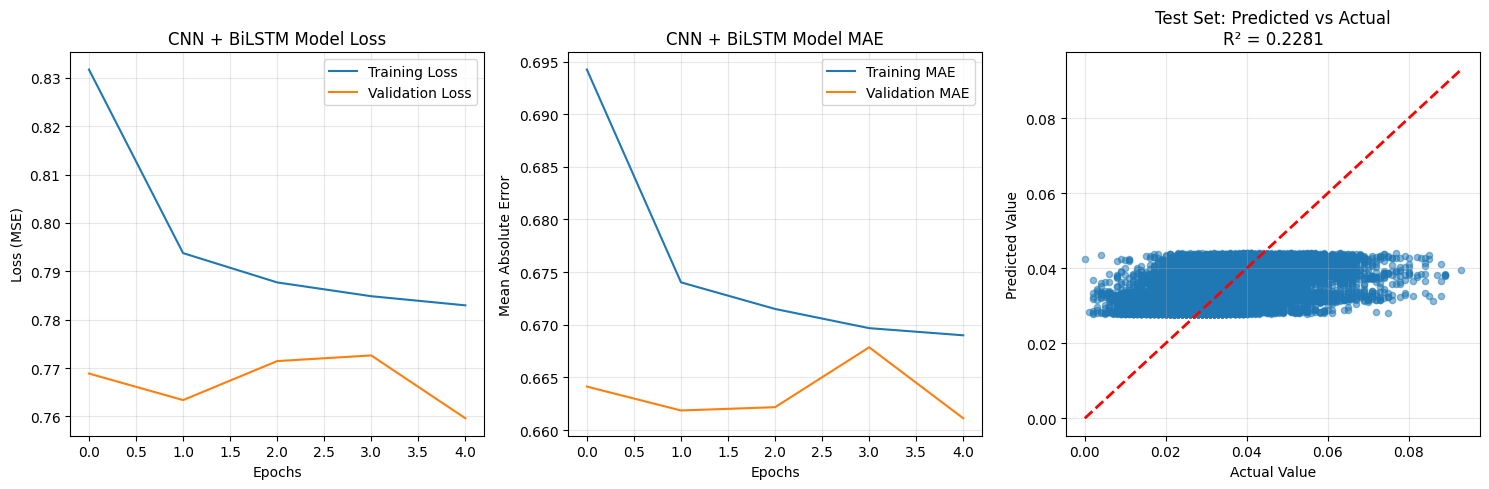


Model saved as 'cnn_bilstm_underhill_model.h5'


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 10, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 5, 200)         │       132,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,207 (2.76 MB)

 Trainable params: 240,735 (940.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 481,472 (1.84 MB)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Split Underhill dataset: 80% train, 20% temp (for validation and test)
underhill_train, underhill_temp = train_test_split(underhill_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
underhill_val, underhill_test = train_test_split(underhill_temp, test_size=0.5, random_state=42)

print("Underhill Dataset Split (80-10-10):")
print(f"Training set: {len(underhill_train)} rows")
print(f"Validation set: {len(underhill_val)} rows")
print(f"Test set: {len(underhill_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for CNN + BiLSTM model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Underhill dataset
print("Preparing features...")

# Underhill dataset
underhill_train_X, underhill_train_y = prepare_features(underhill_train)
underhill_val_X, underhill_val_y = prepare_features(underhill_val)
underhill_test_X, underhill_test_y = prepare_features(underhill_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if underhill_train_y is not None and underhill_train_y.isnull().any():
    underhill_train_y = underhill_train_y.fillna(underhill_train_y.median())

# Impute NaNs in y_val with its median
if underhill_val_y is not None and underhill_val_y.isnull().any():
    underhill_val_y = underhill_val_y.fillna(underhill_val_y.median())

# Impute NaNs in y_test with its median
if underhill_test_y is not None and underhill_test_y.isnull().any():
    underhill_test_y = underhill_test_y.fillna(underhill_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
underhill_train_X_scaled = scaler_X.fit_transform(underhill_train_X)
underhill_val_X_scaled = scaler_X.transform(underhill_val_X)
underhill_test_X_scaled = scaler_X.transform(underhill_test_X)

underhill_train_y_scaled = scaler_y.fit_transform(underhill_train_y.values.reshape(-1, 1)).flatten()
underhill_val_y_scaled = scaler_y.transform(underhill_val_y.values.reshape(-1, 1)).flatten()
underhill_test_y_scaled = scaler_y.transform(underhill_test_y.values.reshape(-1, 1)).flatten()

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
underhill_train_X_seq, underhill_train_y_seq = create_sequences(underhill_train_X_scaled, underhill_train_y_scaled, sequence_length)
underhill_val_X_seq, underhill_val_y_seq = create_sequences(underhill_val_X_scaled, underhill_val_y_scaled, sequence_length)
underhill_test_X_seq, underhill_test_y_seq = create_sequences(underhill_test_X_scaled, underhill_test_y_scaled, sequence_length)

# CNN + BiLSTM Model Architecture
def create_cnn_bilstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # CNN layers
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(0.2)(conv1)

    # BiLSTM layers
    bilstm1 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(conv1)
    bilstm2 = Bidirectional(LSTM(50, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(bilstm1)

    # Dense layers
    dense1 = Dense(50, activation='relu')(bilstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, underhill_train_X_scaled.shape[1])
cnn_bilstm_model = create_cnn_bilstm_model(input_shape)

# Compile the model
cnn_bilstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = cnn_bilstm_model.fit(
    underhill_train_X_seq, underhill_train_y_seq,
    validation_data=(underhill_val_X_seq, underhill_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
underhill_train_pred = cnn_bilstm_model.predict(underhill_train_X_seq)
underhill_val_pred = cnn_bilstm_model.predict(underhill_val_X_seq)
underhill_test_pred = cnn_bilstm_model.predict(underhill_test_X_seq)

# Inverse transform predictions and actual values
underhill_train_y_actual = scaler_y.inverse_transform(underhill_train_y_seq.reshape(-1, 1)).flatten()
underhill_val_y_actual = scaler_y.inverse_transform(underhill_val_y_seq.reshape(-1, 1)).flatten()
underhill_test_y_actual = scaler_y.inverse_transform(underhill_test_y_seq.reshape(-1, 1)).flatten()

underhill_train_y_pred = scaler_y.inverse_transform(underhill_train_pred).flatten()
underhill_val_y_pred = scaler_y.inverse_transform(underhill_val_pred).flatten()
underhill_test_y_pred = scaler_y.inverse_transform(underhill_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(underhill_train_y_actual, underhill_train_y_pred, "Training")
val_metrics = calculate_metrics(underhill_val_y_actual, underhill_val_y_pred, "Validation")
test_metrics = calculate_metrics(underhill_test_y_actual, underhill_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN + BiLSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('CNN + BiLSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(underhill_test_y_actual, underhill_test_y_pred, alpha=0.5, s=20)
plt.plot([underhill_test_y_actual.min(), underhill_test_y_actual.max()],
         [underhill_test_y_actual.min(), underhill_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
cnn_bilstm_model.save('cnn_bilstm_underhill_model.h5')
print("\nModel saved as 'cnn_bilstm_underhill_model.h5'")

# Print the model summary
cnn_bilstm_model.summary()
